In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [83]:
file_path = "Downloads/Employee.csv"
df = pd.read_csv(file_path)


In [105]:
## Print unique values and Length
unique_values = {}
for column in df.columns:
    unique_values[column] = {
        'unique_values': df[column].unique(),
        'count': len(df[column].unique())
    }


for column, values in unique_values.items():
    print(f"Column: {column}\nUnique Values: {values['unique_values']}\nCount: {values['count']}\n")



Column: Age
Unique Values: [20.         30.         35.         40.         23.         32.04132231
 34.         45.         18.         22.         32.         37.
 50.         21.         46.         36.         26.         41.
 24.         25.         43.         19.         38.         51.
 31.         44.         33.         17.         54.        ]
Count: 29

Column: Salary
Unique Values: [5000. 2300. 3000. 4000. 6000. 7000. 8000. 9000. 1089. 1234. 3030. 3045.
 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934. 4034.
 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787. 3454.
 5654. 5009. 5098. 3033.]
Count: 40

Column: Gender
Unique Values: [0 1]
Count: 2

Column: Company_Congnizant
Unique Values: [False  True]
Count: 2

Column: Company_Infosys
Unique Values: [False  True]
Count: 2

Column: Company_Infosys Pvt Lmt
Unique Values: [False  True]
Count: 2

Column: Company_TCS
Unique Values: [ True False]
Count: 2

Column: Company_Tata Consultancy Services

In [85]:

print("Statistical Analysis:")
print(df.describe(include='all'), "\n")  # include='all' to get stats for categorical features too




Statistical Analysis:
       Company         Age       Salary   Place Country      Gender
count      140  130.000000   124.000000     134     148  148.000000
unique       6         NaN          NaN      11       1         NaN
top        TCS         NaN          NaN  Mumbai   India         NaN
freq        53         NaN          NaN      37     148         NaN
mean       NaN   30.484615  5312.467742     NaN     NaN    0.222973
std        NaN   11.096640  2573.764683     NaN     NaN    0.417654
min        NaN    0.000000  1089.000000     NaN     NaN    0.000000
25%        NaN   22.000000  3030.000000     NaN     NaN    0.000000
50%        NaN   32.500000  5000.000000     NaN     NaN    0.000000
75%        NaN   37.750000  8000.000000     NaN     NaN    0.000000
max        NaN   54.000000  9876.000000     NaN     NaN    1.000000 



In [86]:
df_renamed = df.rename(columns={
    'Company': 'Employer',
    'Age': 'Employee_Age',
    'Salary': 'Monthly_Salary',
    'Place': 'Work_Location',
    'Country': 'Residence_Country',
    'Gender': 'Gender_Code'
})


In [87]:
df_clean = df[['Age', 'Salary']].dropna() 
print("Statistical Summary for Age and Salary:")
print(df_clean.describe())

Statistical Summary for Age and Salary:
              Age       Salary
count  107.000000   107.000000
mean    30.280374  5230.149533
std     11.569963  2738.914662
min      0.000000  1089.000000
25%     22.000000  3000.000000
50%     33.000000  4824.000000
75%     37.500000  8202.000000
max     54.000000  9876.000000


Text(0, 0.5, 'Frequency')

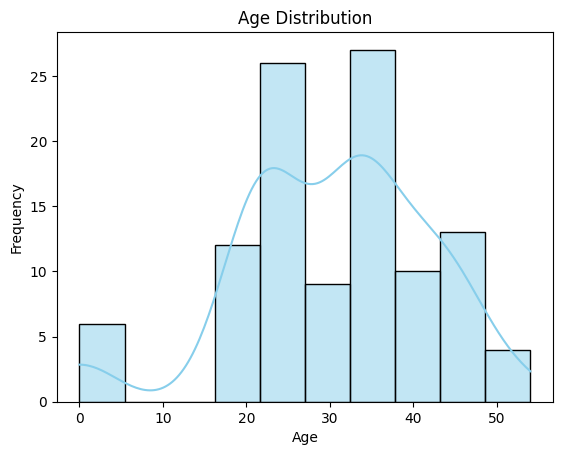

In [88]:
sns.histplot(df_clean['Age'], kde=True, bins=10, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

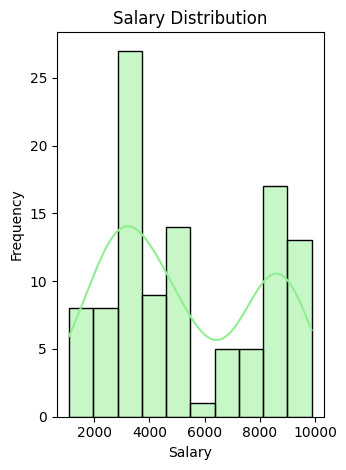

In [89]:
plt.subplot(1, 2, 2)
sns.histplot(df_clean['Salary'], kde=True, bins=10, color='lightgreen')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [90]:
print("\nStatistical Analysis Summary:")
stats = df.describe(include='all')
print(stats)


Statistical Analysis Summary:
       Company         Age       Salary   Place Country      Gender
count      140  130.000000   124.000000     134     148  148.000000
unique       6         NaN          NaN      11       1         NaN
top        TCS         NaN          NaN  Mumbai   India         NaN
freq        53         NaN          NaN      37     148         NaN
mean       NaN   30.484615  5312.467742     NaN     NaN    0.222973
std        NaN   11.096640  2573.764683     NaN     NaN    0.417654
min        NaN    0.000000  1089.000000     NaN     NaN    0.000000
25%        NaN   22.000000  3030.000000     NaN     NaN    0.000000
50%        NaN   32.500000  5000.000000     NaN     NaN    0.000000
75%        NaN   37.750000  8000.000000     NaN     NaN    0.000000
max        NaN   54.000000  9876.000000     NaN     NaN    1.000000


In [91]:


df['Age'] = df['Age'].replace(0, np.nan)


print("Missing Values (Before Treatment):")
print(df.isnull().sum(), "\n")


Missing Values (Before Treatment):
Company     8
Age        24
Salary     24
Place      14
Country     0
Gender      0
dtype: int64 



In [92]:

print(f"Number of duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"After removing duplicates, data now has {len(df)} rows.\n")


df['Age'].fillna(df['Age'].mean(), inplace=True)  # Replace NaN in 'Age' with mean
df['Salary'].fillna(df['Salary'].median(), inplace=True)  # Replace NaN in 'Salary' with median
df['Place'].fillna(df['Place'].mode()[0], inplace=True)  # Replace NaN in 'Place' with mode
df['Company'].fillna(df['Company'].mode()[0], inplace=True)  # Replace NaN in 'Company' with mode

print("Missing Values (After Treatment):")
print(df.isnull().sum(), "\n")


Number of duplicate rows: 4
After removing duplicates, data now has 144 rows.

Missing Values (After Treatment):
Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64 



C:\Users\97155\AppData\Local\Temp\ipykernel_5728\582279233.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)  # Replace NaN in 'Age' with mean
C:\Users\97155\AppData\Local\Temp\ipykernel_5728\582279233.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

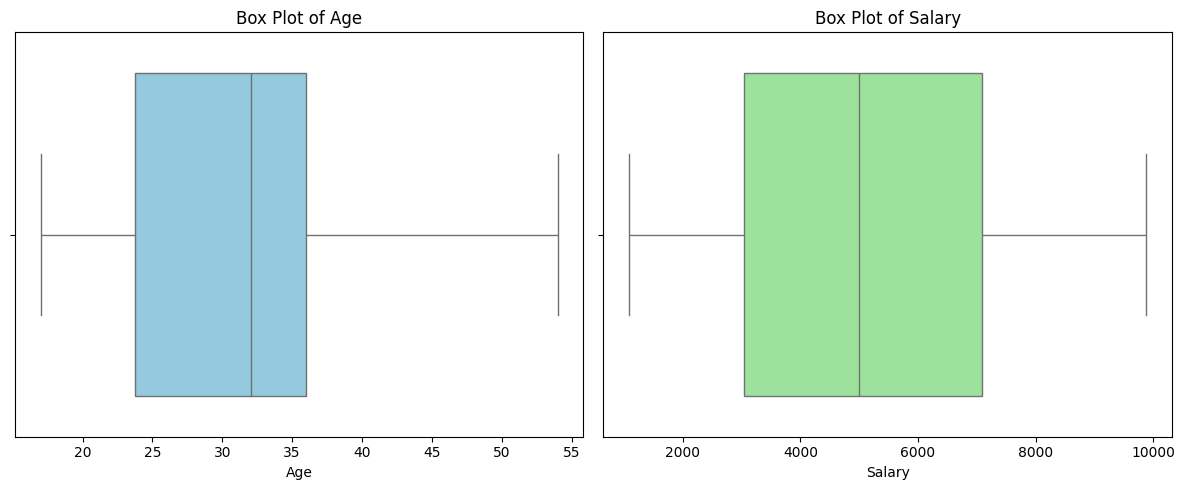

In [93]:

plt.figure(figsize=(12, 5))

# Box plot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'], color='skyblue')
plt.title('Box Plot of Age')

# Box plot for Salary
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Salary'], color='lightgreen')
plt.title('Box Plot of Salary')

plt.tight_layout()
plt.show()


In [94]:

# 7. Handle outliers -IQR method
def handle_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

handle_outliers('Age')
handle_outliers('Salary')

print("\nData after treating outliers:")
print(df[['Age', 'Salary']].describe())




Data after treating outliers:
              Age       Salary
count  144.000000   144.000000
mean    32.041322  5238.194444
std      8.234667  2370.641804
min     17.000000  1089.000000
25%     23.750000  3045.000000
50%     32.041322  5000.000000
75%     36.000000  7084.000000
max     54.000000  9876.000000


In [95]:
output_path = "C:\\Users\\97155\\Downloads\\Cleaned_data.csv"
df.to_csv(output_path, index=False)
print(f"Cleaned data saved to: {output_path}")

Cleaned data saved to: C:\Users\97155\Downloads\Cleaned_data.csv


In [96]:
file_path = "C:\\Users\\97155\\Downloads\\Cleaned_data.csv"
df = pd.read_csv(file_path)

filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
print(f"Filtered Data (Age > 40 and Salary < 5000):\n{filtered_df}\n")



Filtered Data (Age > 40 and Salary < 5000):
     Company   Age  Salary      Place Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
85   Infosys  41.0  3000.0      Delhi   India       0
92   Infosys  54.0  3184.0     Mumbai   India       0
103  Infosys  44.0  4034.0      Delhi   India       0
121  Infosys  44.0  3234.0     Mumbai   India       0
128  Infosys  50.0  3184.0   Calcutta   India       0
135      CTS  44.0  3033.0     Cochin   India       0
137  Infosys  44.0  4034.0  Hyderabad   India       0
141  Infosys  44.0  4034.0      Delhi   India       1



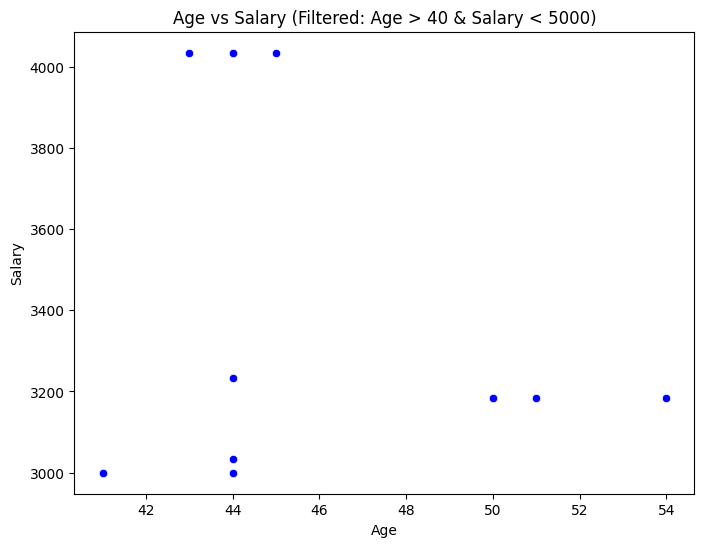

In [97]:

# 3.  Age vs Salary Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', data=filtered_df, color='blue')
plt.title('Age vs Salary (Filtered: Age > 40 & Salary < 5000)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


In [98]:

# 4. number of people from each Place
place_counts = df['Place'].value_counts()
print(f"Number of people from each place:\n{place_counts}\n")


Number of people from each place:
Place
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64



C:\Users\97155\AppData\Local\Temp\ipykernel_5728\1224878965.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=place_counts.index, y=place_counts.values, palette='rainbow')


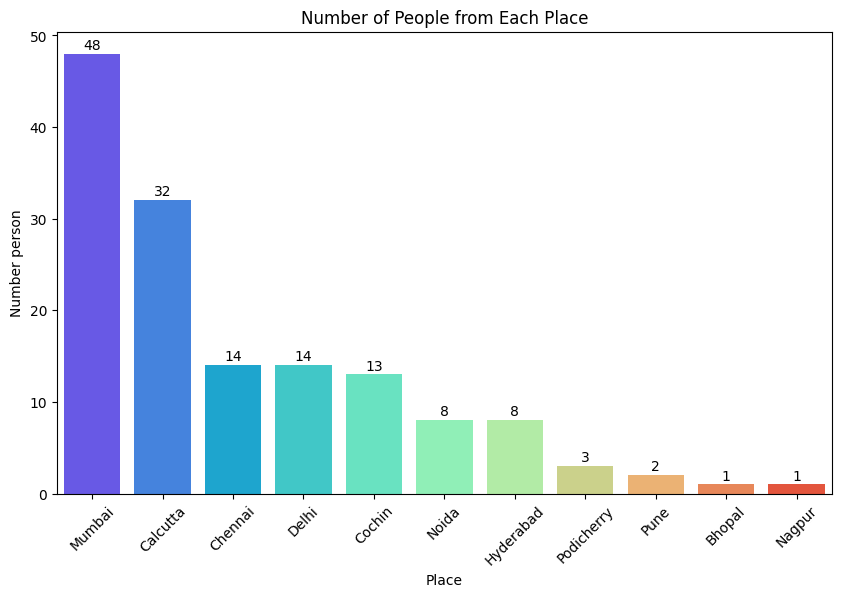

In [109]:

# 5. Visualize the counts using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=place_counts.index, y=place_counts.values, palette='rainbow')
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Number person')
plt.xticks(rotation=45) 
for i in range(len(place_counts)):
    plt.text(i, place_counts.values[i] + 0.5, str(place_counts.values[i]), ha='center')

plt.show()

In [100]:


print("Original Data:")
print(df.head(), "\n")


Original Data:
   Company   Age  Salary     Place Country  Gender
0      TCS  20.0  5000.0   Chennai   India       0
1  Infosys  30.0  5000.0    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0 



In [101]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler


print("Original Data:")
print(df.head(), "\n")




Original Data:
   Company   Age  Salary     Place Country  Gender
0      TCS  20.0  5000.0   Chennai   India       0
1  Infosys  30.0  5000.0    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0 



In [102]:
if 'Gender' in df.columns:
    label_encoder = LabelEncoder()
    df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male -> 1, Female -> 0

#  Apply One-Hot Encoding for nominal features
nominal_columns = ['Company', 'Place', 'Country']

for col in nominal_columns:
    if col in df.columns:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

print("Data after Encoding:")
print(df.head(), "\n")


Data after Encoding:
    Age  Salary  Gender  Company_Congnizant  Company_Infosys  \
0  20.0  5000.0       0               False            False   
1  30.0  5000.0       0               False             True   
2  35.0  2300.0       0               False            False   
3  40.0  3000.0       0               False             True   
4  23.0  4000.0       0               False            False   

   Company_Infosys Pvt Lmt  Company_TCS  Company_Tata Consultancy Services  \
0                    False         True                              False   
1                    False        False                              False   
2                    False         True                              False   
3                    False        False                              False   
4                    False         True                              False   

   Place_Calcutta  Place_Chennai  Place_Cochin  Place_Delhi  Place_Hyderabad  \
0           False           True         Fals

In [103]:
# Perform Feature Scaling

X = df.drop(columns=['Salary']) if 'Salary' in df.columns else df
y = df['Salary'] if 'Salary' in df.columns else None

# StandardScaler (mean=0, std=1)
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X)

print("Features after Standard Scaling:\n", X_standard_scaled[:5], "\n")


Features after Standard Scaling:
 [[-1.46737581 -0.53452248 -0.11867817 -0.65248952 -0.11867817  1.18321596
  -0.11867817 -0.53452248  3.047247   -0.31501848 -0.32816506 -0.24253563
  -0.70710678 -0.0836242  -0.24253563 -0.14586499 -0.11867817]
 [-0.24875897 -0.53452248 -0.11867817  1.53259166 -0.11867817 -0.84515425
  -0.11867817 -0.53452248 -0.32816506 -0.31501848 -0.32816506 -0.24253563
   1.41421356 -0.0836242  -0.24253563 -0.14586499 -0.11867817]
 [ 0.36054944 -0.53452248 -0.11867817 -0.65248952 -0.11867817  1.18321596
  -0.11867817  1.87082869 -0.32816506 -0.31501848 -0.32816506 -0.24253563
  -0.70710678 -0.0836242  -0.24253563 -0.14586499 -0.11867817]
 [ 0.96985786 -0.53452248 -0.11867817  1.53259166 -0.11867817 -0.84515425
  -0.11867817 -0.53452248 -0.32816506 -0.31501848  3.047247   -0.24253563
  -0.70710678 -0.0836242  -0.24253563 -0.14586499 -0.11867817]
 [-1.10179076 -0.53452248 -0.11867817 -0.65248952 -0.11867817  1.18321596
  -0.11867817 -0.53452248 -0.32816506 -0.3150184

In [104]:

# MinMaxScaler 
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)

print("Features after Min-Max Scaling:\n", X_minmax_scaled[:5], "\n")

Features after Min-Max Scaling:
 [[0.08108108 0.         0.         0.         0.         1.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.35135135 0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.         0.        ]
 [0.48648649 0.         0.         0.         0.         1.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.62162162 0.         0.         1.         0.         0.
  0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.        ]
 [0.16216216 0.         0.         0.         0.         1.
  0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.         0.        ]] 

